In [1]:
import pandas as pd
import numpy as np

# Import clean data
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

In [3]:
# Let's get numeric data only
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Libraries for plotting:

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual

##Functions for Plotting

In [5]:
def distribution_plot(red_data, blue_data, red_label, blue_label, title):
    plt.figure(figsize=(6, 5))

    sns.kdeplot(red_data, color="r", label=red_label)
    sns.kdeplot(blue_data, color="b", label=blue_label)

    plt.title(title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()
    plt.show()
    plt.close()

In [6]:
def poly_plot(x_train, x_test, y_train, y_test, model, poly_transform):
    plt.figure(figsize=(6, 5))

    # Generate prediction range
    xmax = max(x_train.values.max(), x_test.values.max())
    xmin = min(x_train.values.min(), x_test.values.min())
    x = np.arange(xmin, xmax, 0.1).reshape(-1, 1)

    # Plot training and test data
    plt.plot(x_train, y_train, 'ro', label='Training Data')
    plt.plot(x_test, y_test, 'go', label='Test Data')

    # Plot predicted polynomial regression curve
    x_poly = poly_transform.fit_transform(x)
    y_pred = model.predict(x_poly)
    plt.plot(x, y_pred, label='Predicted Function')

    # Decorations
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    plt.close()

##Training and Testing

In [7]:
# Target
y_data = df['price']

# Features
x_data=df.drop('price',axis=1)

Now, we randomly split our data into training and testing data using the function <b>train_test_split</b>.


In [8]:
from sklearn.model_selection import train_test_split

# Split dataset for Train and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("Number of test samples :", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

Number of test samples : 21
Number of training samples: 180


In [9]:
# Build Linear Regression model
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train[['horsepower']], y_train)

LinearRegression()

Let's calculate the R^2 on the test data:


In [10]:
# Calculate R^2 score

print("R^2 score for test set:", lr.score(x_test[['horsepower']], y_test))
print("R^2 score for train_score set:", lr.score(x_train[['horsepower']], y_train))

R^2 score for test set: 0.36358755750788263
R^2 score for train_score set: 0.6619724197515104


Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.


##Cross-Validation Score


In [11]:
from sklearn.model_selection import cross_val_score

# Get Cross Validation R^2 score from 4 folds
cv_r2 = cross_val_score(lr, x_data[['horsepower']], y_data, cv=4)
cv_r2

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [12]:
# Calculate mean and standard deviation of estimate
print("Mean:", cv_r2.mean(), "\nStandard Deviation:" , cv_r2.std())

Mean: 0.522009915042119 
Standard Deviation: 0.291183944475603


In [13]:
# Using negative squared error as score
-1 * cross_val_score(lr, x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [14]:
from sklearn.model_selection import cross_val_predict

# Use cross val predict to predict an output by each fold variation
yhat = cross_val_predict(lr,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

##Overfitting, Underfitting and Model Selection

In [15]:
# Train using 4 features
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [16]:
# Prediction of training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [17]:
# Prediction of test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Let's perform some model evaluation using train and test data separately.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

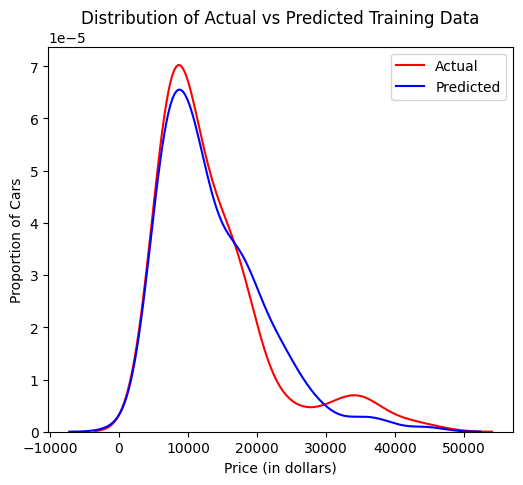

In [19]:
Title = 'Distribution of Actual vs Predicted Training Data'
distribution_plot(y_train, yhat_train, "Actual", "Predicted", Title)

So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.


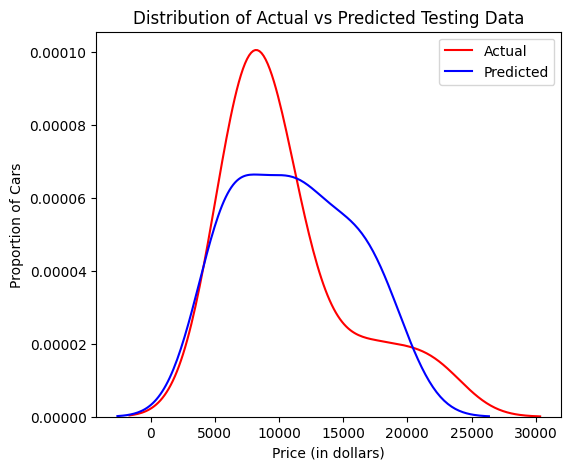

In [20]:
Title = 'Distribution of Actual vs Predicted Testing Data'
distribution_plot(y_test, yhat_test, "Actual", "Predicted", Title)

Test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [21]:
from sklearn.preprocessing import PolynomialFeatures

# Use 55% of data for training
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

# Use 5 degree polynomial on 'horsepower'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [22]:
# Train
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "yhat".


In [23]:
# Predict
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

Let's take the first five predicted values and compare it to the actual targets.


In [24]:
# Compare predicted vs actual first 5 values
print("Predicted:", yhat[0:4])
print("Actual:", y_test[0:4].values)

Predicted: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
Actual: [ 6295. 10698. 13860. 13499.]


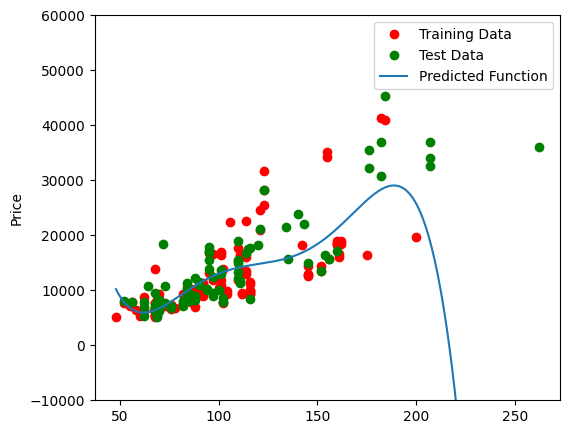

In [25]:
# Display train and test data, with the prediction
poly_plot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.


In [26]:
# R^2 scores
print("R^2 for training data:", poly.score(x_train_pr, y_train))
print("R^2 for testing data:", poly.score(x_test_pr, y_test))

R^2 for training data: 0.5567716902120254
R^2 for testing data: -29.871340302043684


We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:


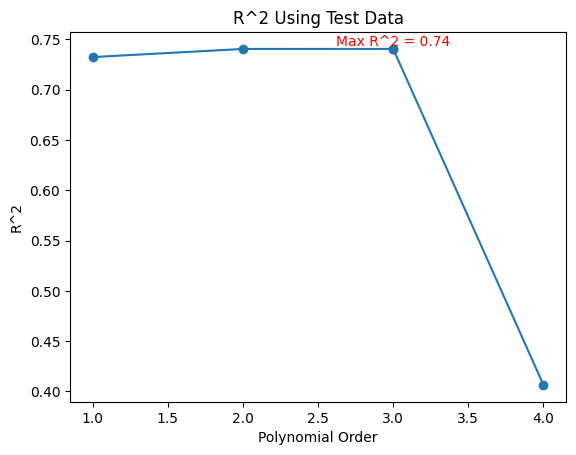

In [27]:
r_squared_test = []
order = [1, 2, 3, 4]

for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.transform(x_test[['horsepower']])

    lr.fit(x_train_pr, y_train)
    r_squared_test.append(lr.score(x_test_pr, y_test))

# Plotting
plt.plot(order, r_squared_test, marker='o')
plt.xlabel('Polynomial Order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

# Highlight the max R^2
max_r2 = max(r_squared_test)
best_order = order[r_squared_test.index(max_r2)]
plt.text(best_order, max_r2, f'Max R^2 = {max_r2:.2f}', ha='center', va='bottom', color='red')
plt.scatter([best_order], [max_r2], color='red')  # Visual point
plt.show()

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


The following function will be used in the next section. Please run the cell below.


In [28]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)

    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.transform(x_test[['horsepower']])

    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    poly_plot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data.


In [29]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

##Ridge Regression

 In this section, we will review Ridge Regression and see how the parameter alpha changes the model.

In [30]:
# Perform 2 degree polynomial on features
pr = PolynomialFeatures(degree=2)

x_train_pr = pr.fit_transform(x_train[['horsepower',
                                       'curb-weight',
                                       'engine-size',
                                       'highway-mpg',
                                       'normalized-losses',
                                       'symboling']])

x_test_pr = pr.transform(x_test[['horsepower',
                                 'curb-weight',
                                 'engine-size',
                                 'highway-mpg',
                                 'normalized-losses',
                                 'symboling']])

 Let's import  <b>Ridge</b>  from the module <b>linear models</b>.


In [31]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1


In [32]:
from sklearn.linear_model import Ridge

# Build & train
ridge_model = Ridge(alpha=1)
ridge_model.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [33]:
# Predict
yhat = ridge_model.predict(x_test_pr)

In [34]:
# Compare first five predicted vs actual values
print('Predicted:', yhat[0:4])
print('Actual:', y_test[0:4].values)

Predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313256]
Actual: [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.


In [35]:
from tqdm import tqdm

r_squared_test = []
r_squared_train = []
alpha = 10 * np.array(range(0,1000))
pbar = tqdm(alpha)

for a in pbar:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(x_train_pr, y_train)

    test_score, train_score = ridge_model.score(x_test_pr, y_test), ridge_model.score(x_train_pr, y_train)
    pbar.set_postfix({"Train Score": train_score, "Test Score": test_score, })

    r_squared_test.append(test_score)
    r_squared_train.append(train_score)

100%|██████████| 1000/1000 [00:17<00:00, 57.27it/s, Train Score=0.859, Test Score=0.564]


We can plot out the value of R^2 for different alphas:


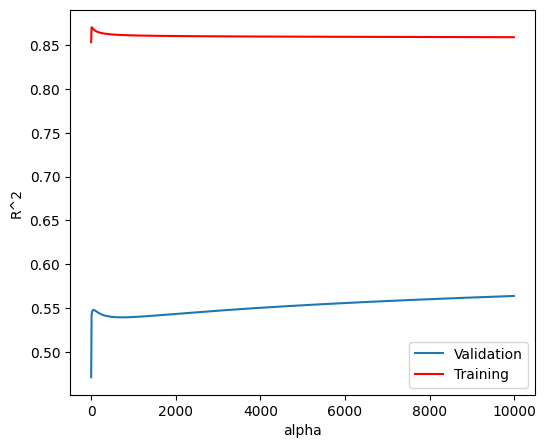

In [36]:
width = 6
height = 5
plt.figure(figsize=(width, height))

plt.plot(alpha, r_squared_test, label='Validation')
plt.plot(alpha, r_squared_train, 'r', label='Training')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The red line represents R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data. The blue line represents R^2 of the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

##Grid Search

In [37]:
from sklearn.model_selection import GridSearchCV

# Create dictionary of various values for parameter
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters

# Create ridge regression object
ridge_regression = Ridge()
ridge_regression

Ridge()

In [38]:
# Create grid search object then train ridge regression
grid = GridSearchCV(ridge_regression, parameters, cv=4)
grid.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [39]:
# Get the best model
best_rr = grid.best_estimator_
best_rr

Ridge(alpha=10000)

In [40]:
# Test
best_rr.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151